# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

#warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

              RetailSales  RetailTransfers  WarehouseSales
ItemType                                                  
BEER            209763.11        234924.44      2437617.32
DUNNAGE              0.00             0.00       -45331.00
KEGS                 0.00             0.00        43558.00
LIQUOR          309847.85        334176.41        33173.32
NON-ALCOHOL       8109.97          9058.37         8656.72
REF                281.34           171.92        -6754.00
STR_SUPPLIES       995.98          3594.70            0.00
WINE            313400.42        340710.51       433009.47


<AxesSubplot:xlabel='ItemType'>

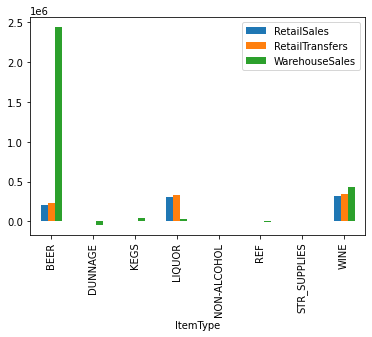

In [5]:
grap = data.groupby('ItemType')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].sum()
print(grap)

grap.plot.bar()

              RetailSales  RetailTransfers  WarehouseSales
ItemType                                                  
BEER            209763.11        234924.44      2437617.32
DUNNAGE              0.00             0.00       -45331.00
KEGS                 0.00             0.00        43558.00
LIQUOR          309847.85        334176.41        33173.32
NON-ALCOHOL       8109.97          9058.37         8656.72
REF                281.34           171.92        -6754.00
STR_SUPPLIES       995.98          3594.70            0.00
WINE            313400.42        340710.51       433009.47


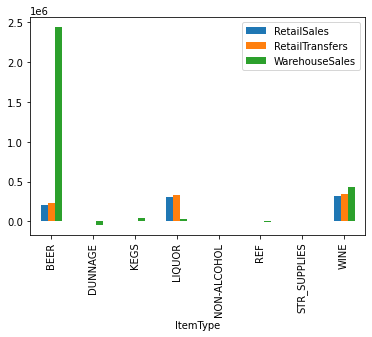

In [10]:

grap = data.groupby('ItemType')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].sum()
print(grap)
grap.plot(kind='bar')
plt.show()

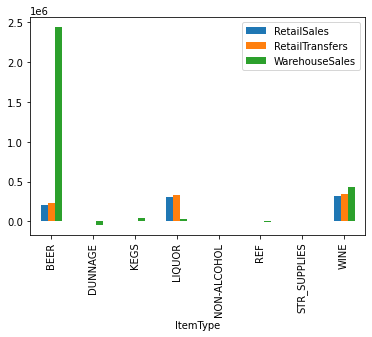

In [9]:

vntmin = data.groupby('ItemType')[['RetailSales', 'RetailTransfers', 'WarehouseSales' ]].sum()

vntmin.plot(kind='bar')
plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

Text(0, 0.5, 'Supplier')

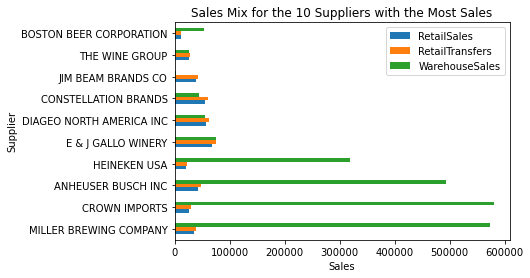

In [12]:
suppliers_sales =data.groupby('Supplier')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].sum()
suppliers_sales['Total'] = suppliers_sales.sum(axis=1)
top10 = suppliers_sales.sort_values(by = 'Total', ascending = False)[:10]
top10.drop('Total', axis =1, inplace = True)



top10.plot.barh()
plt.title('Sales Mix for the 10 Suppliers with the Most Sales')
plt.xlabel('Sales')
plt.ylabel('Supplier')


Text(0, 0.5, 'suppliers')

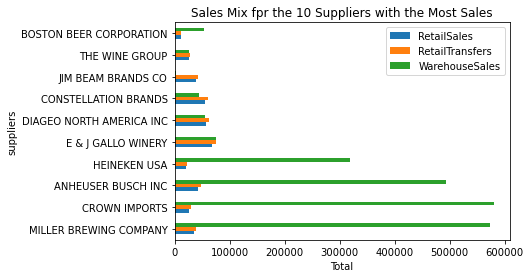

In [18]:
suppliers_sales = data.groupby('Supplier')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].sum()
suppliers_sales['Total'] = suppliers_sales.sum(axis=1)
top10 = suppliers_sales.sort_values(by='Total', ascending= False)[:10]
top10.drop('Total', axis = 1, inplace = True)

top10.plot(kind='barh')
plt.title('Sales Mix fpr the 10 Suppliers with the Most Sales')
plt.xlabel('Total')
plt.ylabel('suppliers')

Text(0, 0.5, 'Supplier')

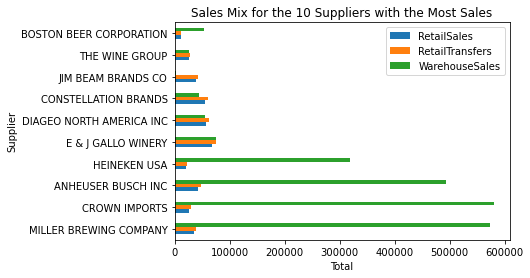

In [3]:
suppliers_sales = data.groupby('Supplier')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].sum()
suppliers_sales['Total'] = suppliers_sales.sum(axis = 1)
top10_suppliers = suppliers_sales.sort_values(by='Total', ascending = False)[:10]
top10_suppliers.drop('Total', axis = 1, inplace =True)

top10_suppliers.plot(kind='barh')
plt.title('Sales Mix for the 10 Suppliers with the Most Sales')
plt.xlabel('Total')
plt.ylabel('Supplier')

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [6]:
data.dtypes

Year                 int64
Month                int64
Supplier            object
ItemCode            object
Description         object
ItemType            object
RetailSales        float64
RetailTransfers    float64
WarehouseSales     float64
dtype: object

Text(0, 0.5, 'Number of Sles')

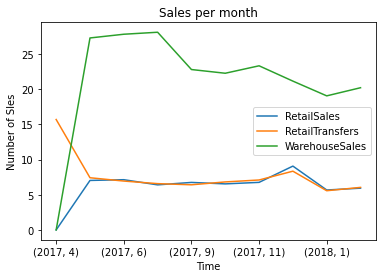

In [8]:
multi = data.groupby(['Year', 'Month']).mean()
multi.plot()
plt.title('Sales per month')
plt.xlabel('Time')
plt.ylabel('Number of Sles')

Text(0, 0.5, 'Number of Sales')

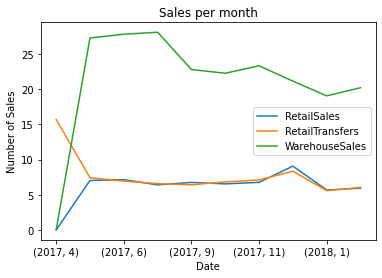

In [21]:
prom= data.groupby(['Year', 'Month']).mean()
prom.plot()
plt.title('Sales per month')
plt.xlabel('Date')
plt.ylabel('Number of Sales')

In [ ]:
prom = data.groupby(['Year', 'Month']).mean()
prom.plot()
plt.title('Sales Per Month')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


## 4. Plot the same information as above but as a bar chart.

<AxesSubplot:xlabel='Year,Month'>

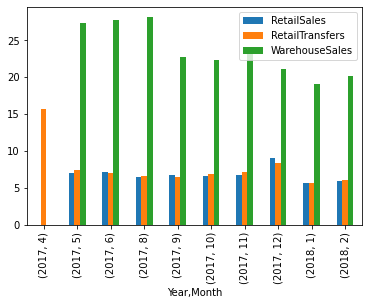

In [10]:
multi.plot(kind='bar')

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

<AxesSubplot:xlabel='Year,Month'>

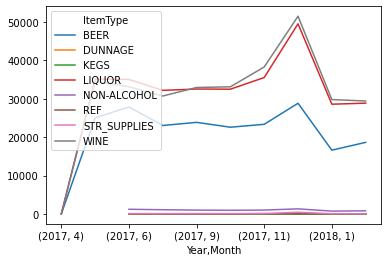

In [26]:
table = pd.crosstab([data['Year'], data['Month']], data['ItemType'],data['RetailSales'], aggfunc = sum,
                   normalize = False)
table.plot()

In [11]:
table = pd.pivot_table(data, values='RetailSales',
                      index = ['Year', 'Month'], columns = 'ItemType',
                      aggfunc = [sum], fill_value = 0)
table

sum                                                         \
ItemType        BEER DUNNAGE KEGS    LIQUOR NON-ALCOHOL    REF STR_SUPPLIES   
Year Month                                                                    
2017 4          0.00       0    0      0.00        0.00   0.00         0.00   
     5      25023.24       0    0  35123.36        0.00   0.00         0.00   
     6      27863.26       0    0  35035.31     1209.23  30.60        89.22   
     8      23030.13       0    0  32186.04     1091.28  19.54        77.34   
     9      23852.76       0    0  32532.32      997.11  38.88        94.64   
     10     22583.78       0    0  32491.59      945.63  22.82        84.38   
     11     23341.14       0    0  35524.77     1005.19  63.11       106.06   
     12     28822.16       0    0  49522.28     1316.44  41.21       439.64   
2018 1      16606.33       0    0  28579.87      732.25  23.66        56.94   
     2      18640.31       0    0  28852.31      812.84  41.52        47.76   

                      
ItemType        WINE  
Year Month            
2017 4          0.00  
     5      34546.89  
     6      33129.64  
     8      30707.45  
     9      32936.89  
     10     33108.76  
     11     38275.92  
     12     51492.76  
2018 1      29792.72  
     2      29409.39

<AxesSubplot:xlabel='Year,Month'>

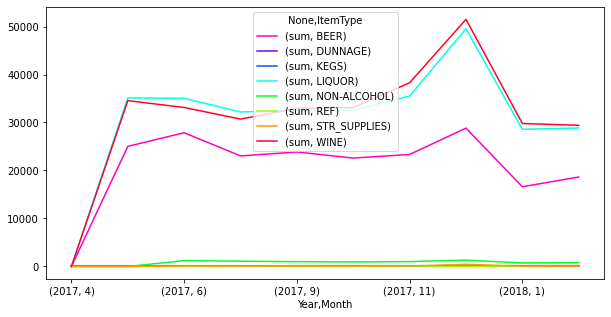

In [27]:
table = pd.pivot_table(data, values='RetailSales',
                       index = ['Year', 'Month'], columns = 'ItemType',
                       aggfunc = [sum], fill_value = 0)
table.plot(colormap = 'gist_rainbow_r', figsize = (10,5))

## 6. Plot the same information as above but as a bar chart.

<AxesSubplot:xlabel='Year,Month'>

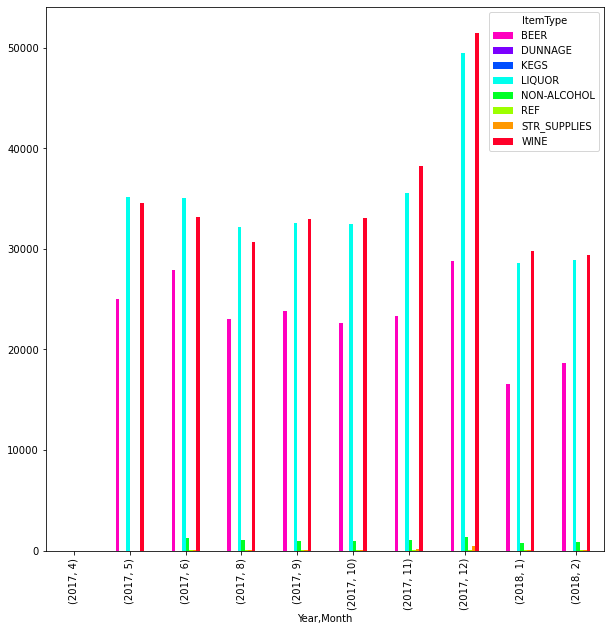

In [29]:
table = pd.crosstab([data['Year'], data['Month']], data['ItemType'],data['RetailSales'], aggfunc = sum,
                   normalize = False)
table.plot(kind = 'bar', colormap = 'gist_rainbow_r', figsize = (10,10))

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

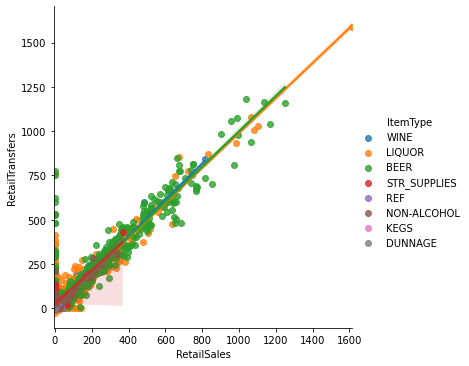

In [30]:
import seaborn as sns



sns.lmplot(x='RetailSales', y='RetailTransfers', hue='ItemType',data=data)


## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [ ]:
data.head()

C:\Users\Yael Aguilar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Yael Aguilar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Yael Aguilar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Yael Aguilar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Yael Aguilar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


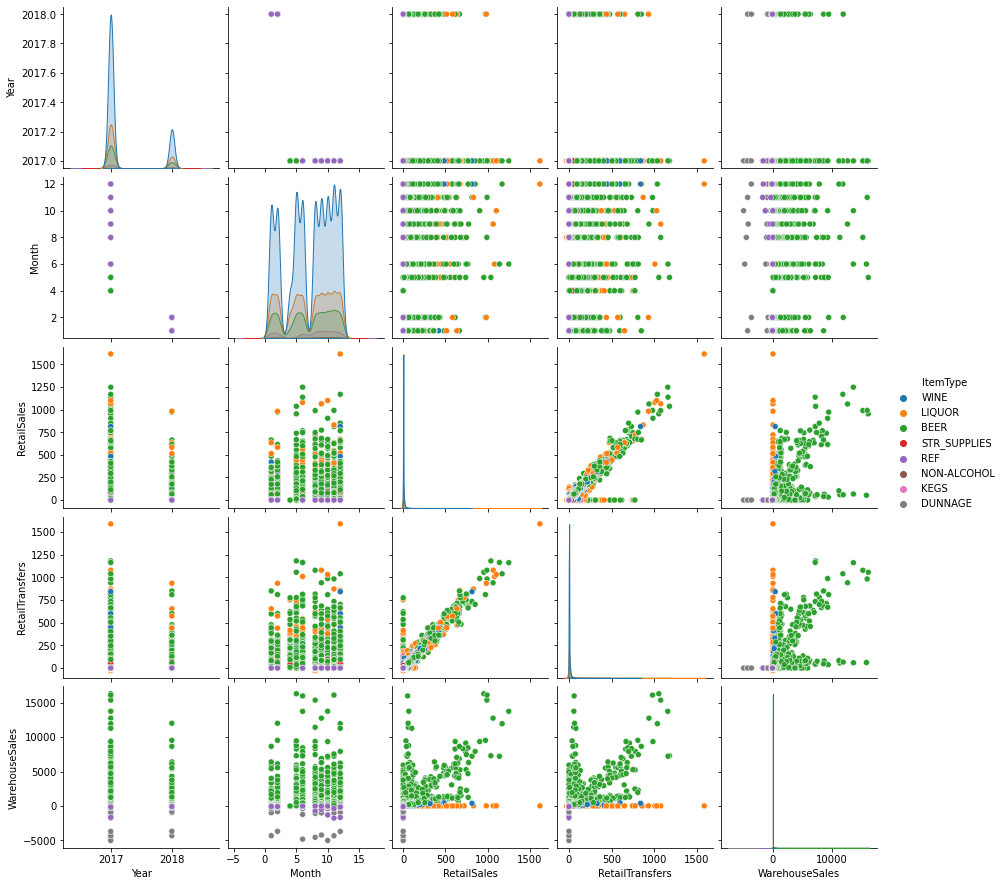

In [31]:
sns.pairplot(data, hue='ItemType')